In [560]:
# import required libraries
import requests as req
import pandas as pd

In [561]:
# importing CarPrice_Assignment.csv with pandas

# CarData= ...('/home/rrouille/Documents/Code/AI_Pro_Training/0x2/tools/code_example/Car_Price.csv')
CarData = pd.read_csv('/home/rrouille/Documents/Code/AI_Pro_Training/0x2/tools/code_example/Car_Price.csv')

CarData.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [562]:
# shape of the dataset
shape = CarData.shape
print(shape)

(205, 26)


In [563]:
# Display general information about the dataset
# This includes the count of non-null entries per column, the data type of each column, and memory usage.
info = CarData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [564]:
# Generate descriptive statistics for numerical columns
# Provide information like mean, standard deviation, min, max, and quartiles.
CarData_numeric = CarData.select_dtypes(include=['float64', 'int64'])
CarData_numeric.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [565]:
# Extract the car's company's name from the variable 'CarName' into the variable 'CarCompany'

CarData['CarCompany'] = CarData['CarName'].apply(lambda x: x.split(' ')[0])

CarData.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarCompany
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [566]:
# #checking the unique values under "CarCompany"
CarData['CarCompany'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [567]:
# replacing the mis-spelling with correct ones

CarData['CarCompany'] = CarData['CarCompany'].replace({'maxda': 'mazda', 'Nissan': 'nissan', 'porcshce': 'porsche', 'toyouta': 'toyota', 'vokswagen': 'volkswagen', 'vw': 'volkswagen'})

# again checking the unique values
CarData.CarCompany.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

/tmp/ipykernel_719164/4215748533.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='CarCompany', y='price', data=CarData, palette='viridis')


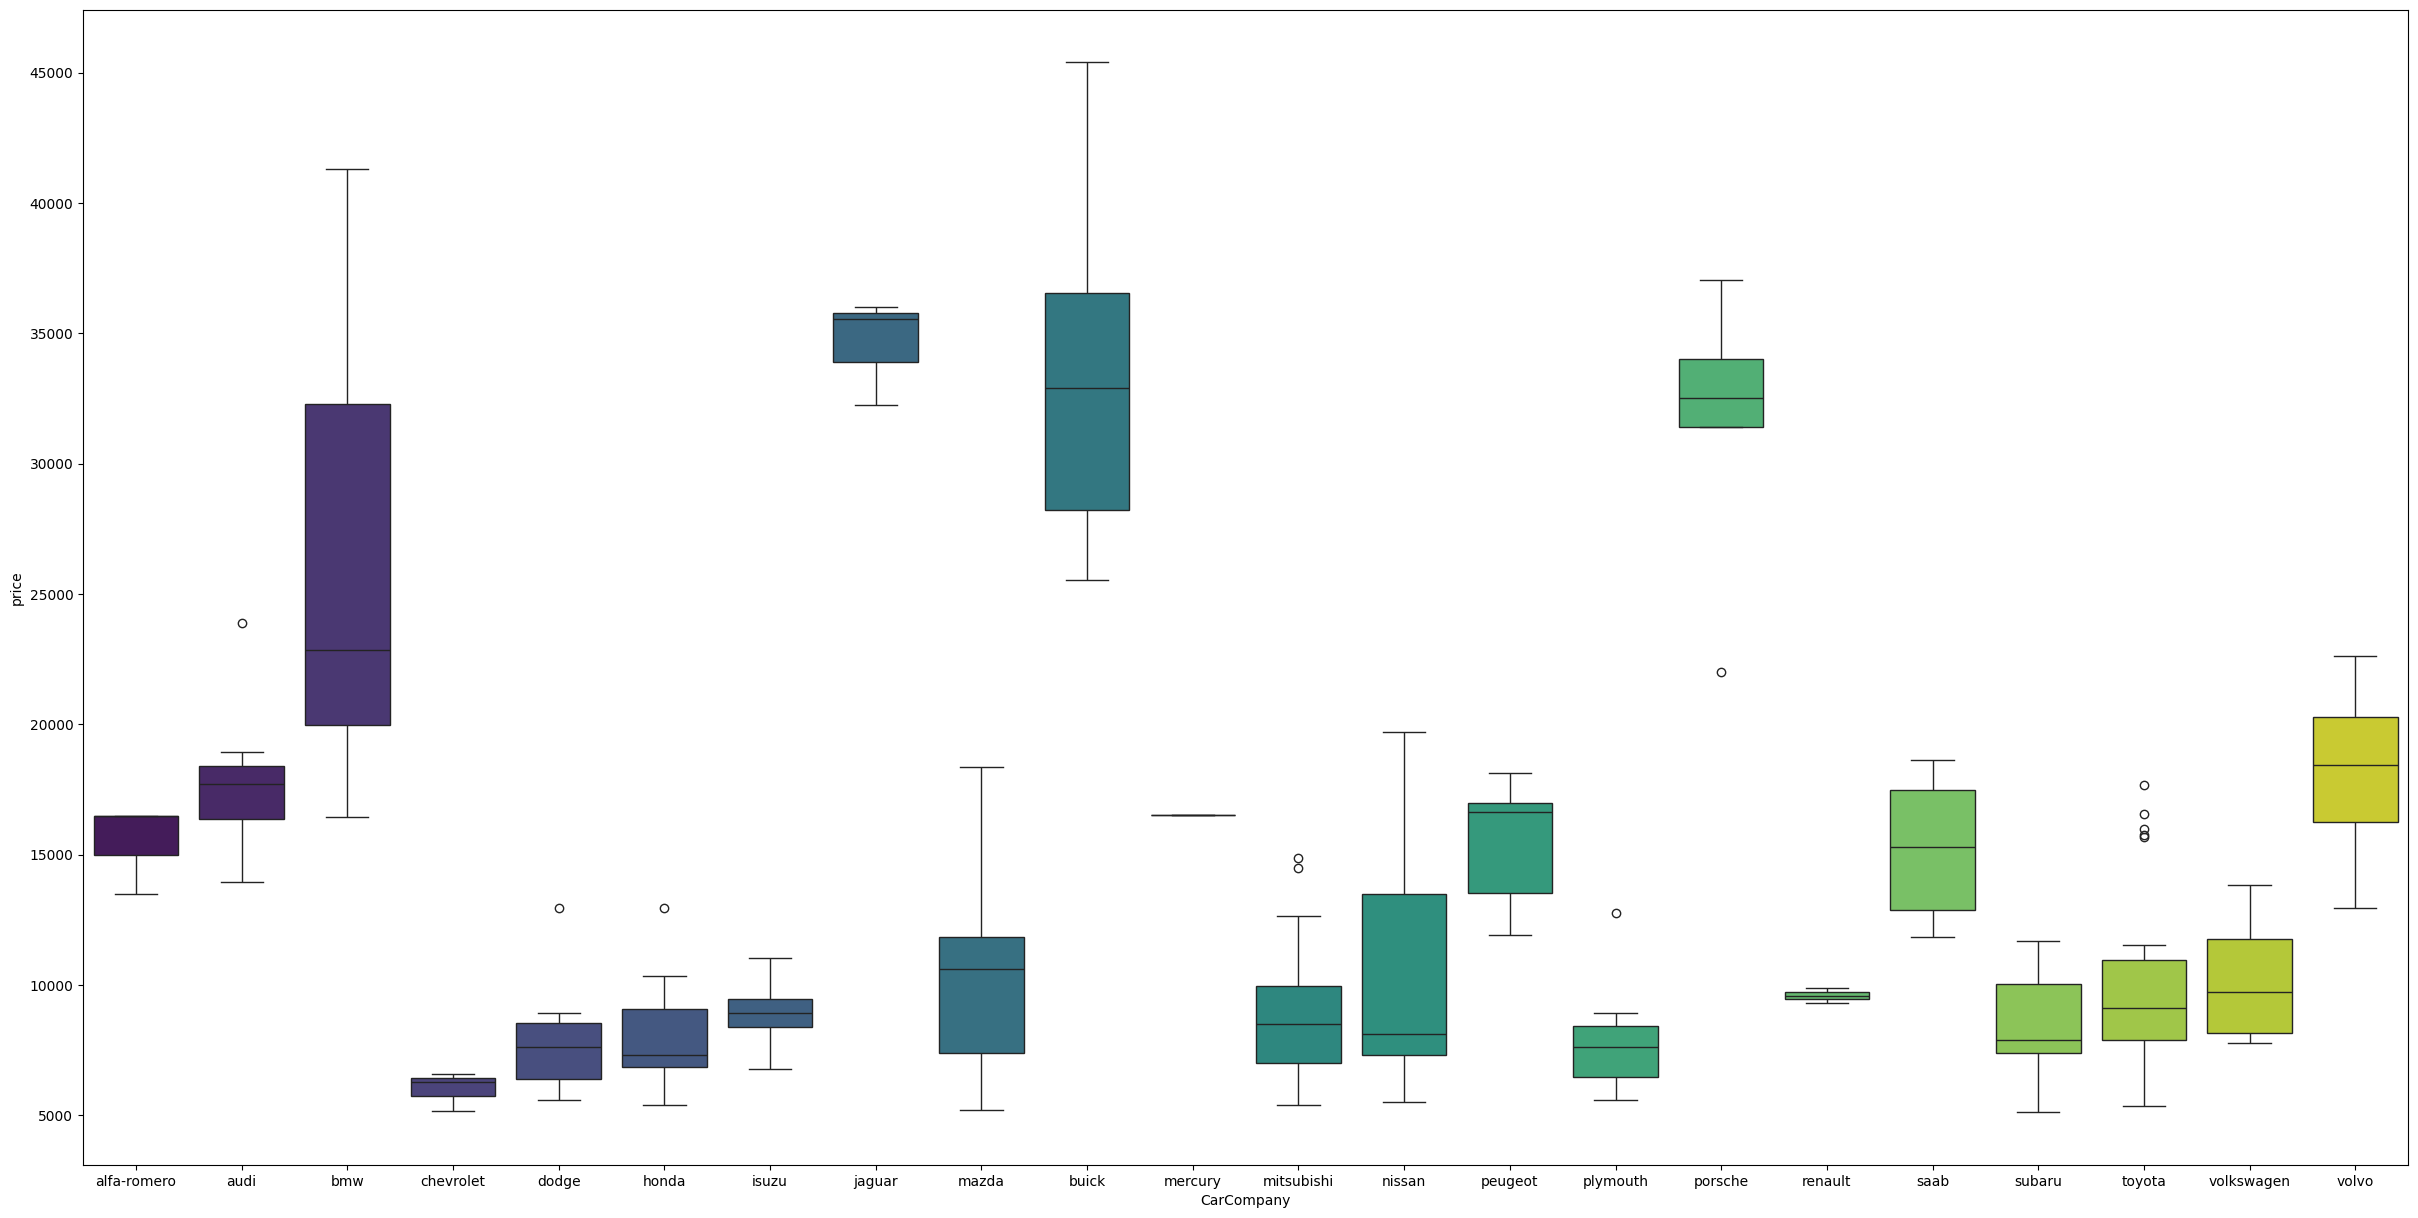

In [568]:
# Visualising 'CarComapny' variable aginst dependent variable 'price' via boxplot

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(30, 15))
sns.boxplot(x='CarCompany', y='price', data=CarData, palette='viridis')
plt.show()

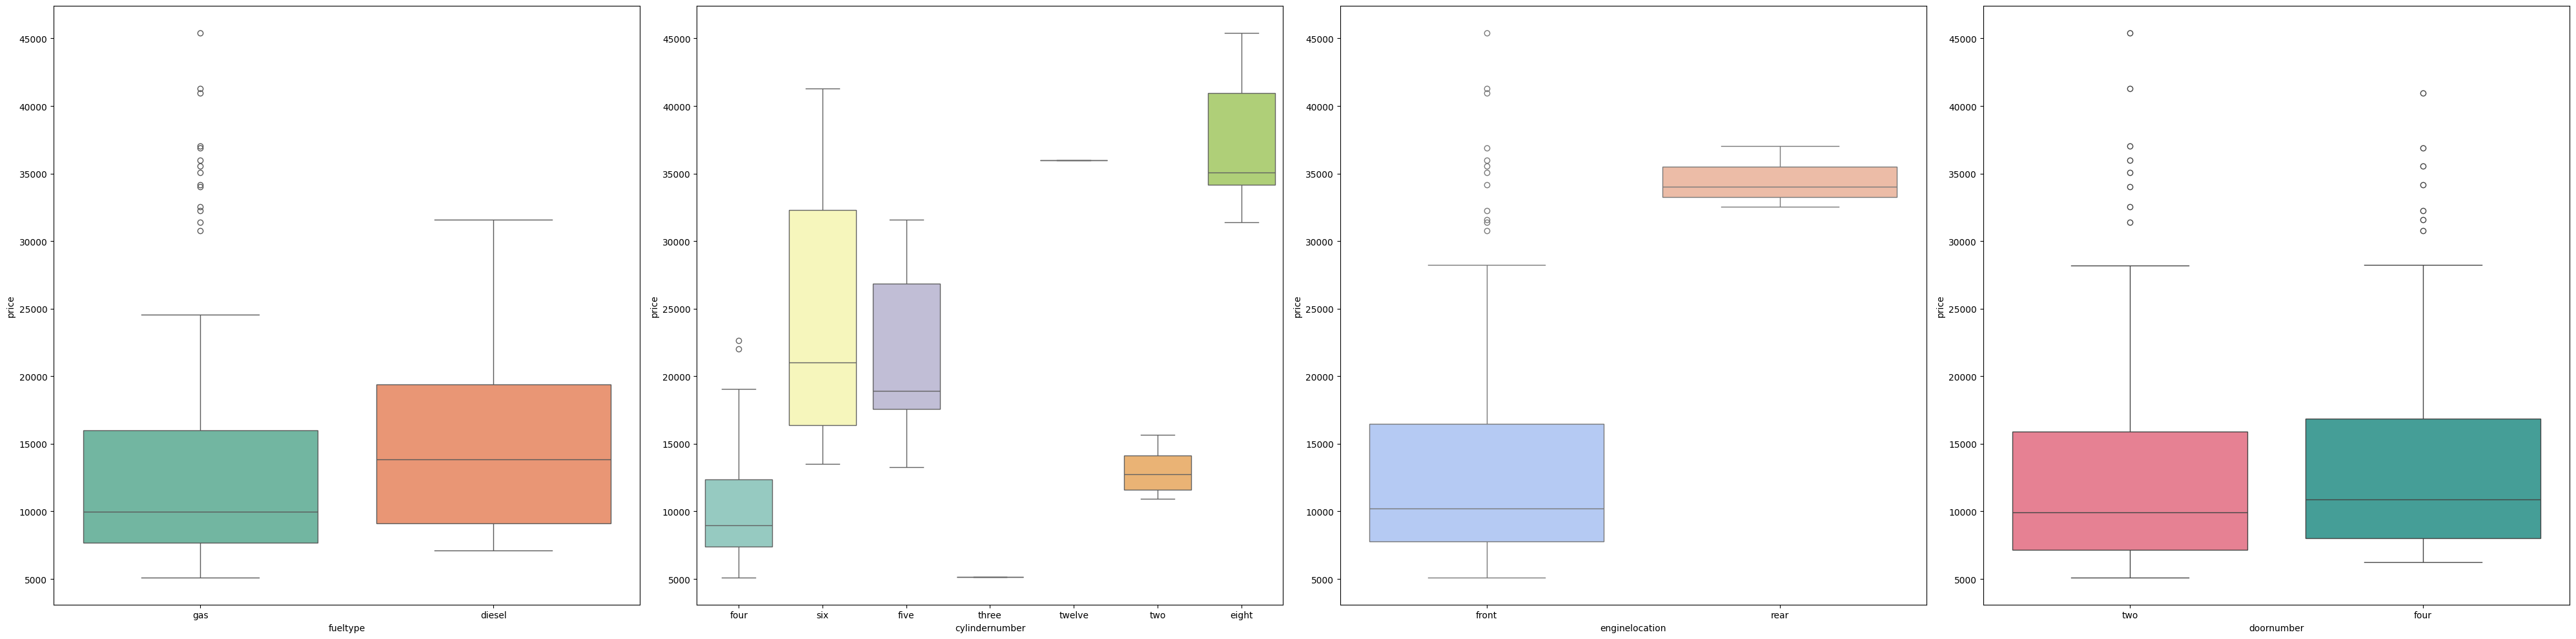

In [569]:
# Visualising Categorical variables through boxplots

fig, axes = plt.subplots(1, 4, figsize=(40, 10))  # 1 ligne, 4 colonnes de subplots

sns.boxplot(x='fueltype', y='price', hue='fueltype', data=CarData, ax=axes[0], palette='Set2', legend=False)
sns.boxplot(x='cylindernumber', y='price', hue='cylindernumber', data=CarData, ax=axes[1], palette='Set3', legend=False)
sns.boxplot(x='enginelocation', y='price', hue='enginelocation', data=CarData, ax=axes[2], palette='coolwarm', legend=False)
sns.boxplot(x='doornumber', y='price', hue='doornumber', data=CarData, ax=axes[3], palette='husl', legend=False)

plt.tight_layout()
plt.show()

In [570]:
#creating a dict 'company price' where key = car's company and value = median of their price

# Extract datas
CarData['CarCompany'] = CarData['CarName'].apply(lambda x: x.split(' ')[0].lower())

# Calculate mediane
company_price = CarData.groupby('CarCompany')['price'].median().to_dict()

# Print it
company_price

{'alfa-romero': 16500.0,
 'audi': 17710.0,
 'bmw': 22835.0,
 'buick': 32892.0,
 'chevrolet': 6295.0,
 'dodge': 7609.0,
 'honda': 7295.0,
 'isuzu': 8916.5,
 'jaguar': 35550.0,
 'maxda': 5645.0,
 'mazda': 10795.0,
 'mercury': 16503.0,
 'mitsubishi': 8499.0,
 'nissan': 8124.0,
 'peugeot': 16630.0,
 'plymouth': 7609.0,
 'porcshce': 32528.0,
 'porsche': 32714.25,
 'renault': 9595.0,
 'saab': 15275.0,
 'subaru': 7894.0,
 'toyota': 8948.0,
 'toyouta': 15750.0,
 'vokswagen': 7775.0,
 'volkswagen': 9495.0,
 'volvo': 18420.0,
 'vw': 10787.5}

In [571]:
# Division in the buckets of low i.e. below 10000, medium i.e. range b/w 10000 and 20000 and high i.e. above 20000
bins = [0, 10000, 20000, float('inf')]
labels = ['low', 'med', 'high']


CarData['CarCompany'] = CarData['CarName'].apply(lambda x: x.split(' ')[0].lower())
company_price = CarData.groupby('CarCompany')['price'].median().to_dict()
CarData['CompanyPrice'] = CarData['CarCompany'].map(company_price)
    
# Mapping the company_price on the 'CarCompany' column in the dataset
CarData['PriceCategory'] = pd.cut(CarData['CompanyPrice'], bins=bins, labels=labels)
CarData['CarCompany'] = CarData['PriceCategory'].astype(str)

# Checking the column's unique values
CarData.CarCompany.unique()

array(['med', 'high', 'low'], dtype=object)

In [572]:
#creating dummy variable for catwegorical variables
CarData = pd.get_dummies(CarData, columns=['CarCompany', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem', 'CarCompany'], drop_first=True)
CarData = CarData.drop(['CarName', 'CompanyPrice', 'PriceCategory'], axis=1)
CarData = CarData.astype('float')

#checking the dataset
CarData.head()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,...,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,CarCompany_low,CarCompany_med
0,1.0,3.0,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,2.0,3.0,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,3.0,1.0,94.5,171.2,65.5,52.4,2823.0,152.0,2.68,3.47,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,4.0,2.0,99.8,176.6,66.2,54.3,2337.0,109.0,3.19,3.40,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,5.0,2.0,99.4,176.6,66.4,54.3,2824.0,136.0,3.19,3.40,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [573]:
# importing required library
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively

CarData_train, CarData_test = train_test_split(CarData, train_size=0.7, test_size=0.3, random_state=100)

# shape of the train and test sets
print(CarData_train.shape)
print(CarData_test.shape)

(143, 49)
(62, 49)


In [574]:
#importing required function for scaling

from sklearn.preprocessing import MinMaxScaler


In [575]:
y_train = CarData_train.pop('price')
X_train = CarData_train

y_test = CarData_test.pop('price')
X_test = CarData_test

In [576]:
# Train your model
from sklearn.linear_model import LinearRegression

In [577]:
# Making predictions
lm = LinearRegression()
lm.fit(X_train, y_train)

predicted_price = lm.predict(X_test)

In [578]:
# Show predictions
predicted_price

array([ 8174.94966095,  9498.56480843, 11235.27130751,  7578.29197131,
        6043.50543068, 11100.70535969, 19825.01636876, 20740.96725316,
       16501.08378095, 16360.22094878, 18452.06621729, 14867.06284138,
       16830.08391736, 10159.41221635, 42738.12393206,  6268.26482218,
        7344.37616932, 14282.56699586, 15552.68108342, 13393.52309013,
       16750.45735492, 16741.31188029, 34029.00996494,  6595.44510307,
       12863.41255943, 15651.19581161, 13623.87071653, 28786.63816102,
       18380.00108969,  9966.12977542,  7239.05491921, 31936.56555959,
       16092.6672936 , 22158.0264333 , 12103.52154885, 11960.54316863,
       25611.78514998, 12358.64445242,  6039.09508094,  9731.49692949,
       41215.42071307, 12807.10469214,  6848.55359393,  9282.59269415,
        5717.9048797 ,  9531.53159833,  7086.06172266,  8834.81740541,
        9226.45916954, 10951.73506516,  7543.65964297, 12855.45563806,
        7021.7460903 , 10396.37455177, 18389.79780977,  7297.92994719,
      

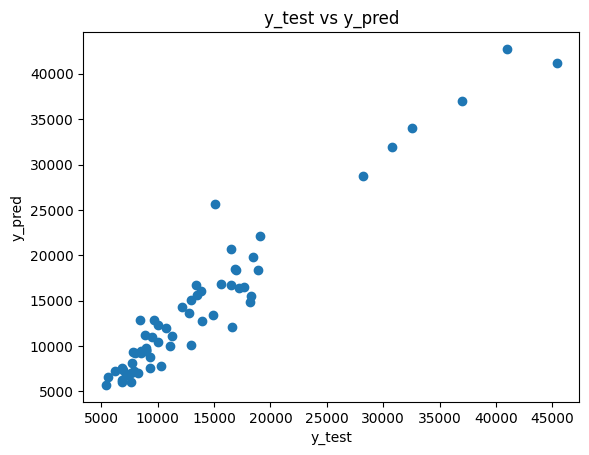

In [582]:
# Plotting y_test and y_pred to understand the spread.
import matplotlib.pyplot as plt

plt.scatter(y_test, predicted_price)
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.title('y_test vs y_pred')
plt.show()

In [584]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, predicted_price)
print(r2)

0.9247308812947765
